# Comparing ARCOS 2018 to 2019
coded by Maddie Warndorf

**Can only compare Q1 and Q2**

- REPORT 1 RETAIL DRUG DISTRIBUTION BY ZIP CODE WITHIN STATE BY GRAMS WT
- REPORT 2 RETAIL DRUG DISTRIBUTION BY STATE WITHIN DRUG CODE BY GRAMS WT
- REPORT 3 QUARTERLY DRUG DISTRIBUTION BY STATE PER 100K POPULATION BY GRAM WT
- REPORT 4 CUMULATIVE DISTRIBUTION BY STATE IN GRAMS PER 100,000 POPULATION
- REPORT 5 STATISTICAL SUMMARY FOR RETAIL DRUG PURCHASES BY GRAMS WT

Tempe, AZ Zip Code: 852

Cincinnati, OH Zip Code: 452

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Report 1

### Tempe, AZ

In [5]:
rp1_18 = pd.read_csv('ARCOSData/ARCOS_Report1_2018.csv')
rp1_18.head()

,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,QUARTER_3,QUARTER_4,TOTAL_GRAMS
0,CODEINE,AZ,850,15027.17,13181.40,14592.50,13455.85,56256.92
1,CODEINE,AZ,851,3232.52,2261.54,2179.95,2217.55,9891.56
2,CODEINE,AZ,852,20137.67,16989.11,16143.69,15622.58,68893.05
3,CODEINE,AZ,853,9861.14,8207.01,7895.83,7458.12,33422.10
4,CODEINE,AZ,855,843.88,705.39,873.12,845.35,3267.74


In [10]:
tempe1_18 = rp1_18[rp1_18['ZIP_CODE']==852]
drops = ['index','QUARTER_3','QUARTER_4','TOTAL_GRAMS']
tempe1_18.reset_index(inplace=True)
tempe1_18.drop(drops, axis=1, inplace=True)
tempe1_18['TOTAL_GRAMS'] = tempe1_18['QUARTER_1'] + tempe1_18['QUARTER_2']
tempe1_18

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,TOTAL_GRAMS
0,CODEINE,AZ,852,20137.67,16989.11,37126.78
1,BUPRENORPHINE,AZ,852,2739.25,2847.19,5586.44
2,HYDROMORPHONE,AZ,852,1777.03,1471.75,3248.78
3,HYDROCODONE,AZ,852,23301.13,21636.06,44937.19
4,MEPERIDINE,AZ,852,1824.90,1910.28,3735.18
5,METHADONE,AZ,852,19277.99,18360.33,37638.32
6,MORPHINE,AZ,852,30427.31,27387.48,57814.79
7,OXYMORPHONE,AZ,852,823.99,786.25,1610.24
8,TAPENTADOL,AZ,852,12336.50,12096.50,24433.00
9,FENTANYL_BASE,AZ,852,500.19,413.11,913.30


In [39]:
print("Tempe 2018 Q1")
print(tempe1_18.QUARTER_1.describe())
print("Tempe 2018 Q2")
print(tempe1_18.QUARTER_2.describe())
print(stats.shapiro(tempe1_18.QUARTER_1))
print(stats.shapiro(tempe1_18.QUARTER_2))
stats.levene(tempe1_18.QUARTER_1,tempe1_18.QUARTER_2)

Tempe 2018 Q1
count       10.000000
mean     11314.596000
std      11219.227772
min        500.190000
25%       1788.997500
50%       7537.875000
75%      19922.750000
max      30427.310000
Name: QUARTER_1, dtype: float64
Tempe 2018 Q2
count       10.000000
mean     10389.806000
std      10140.567111
min        413.110000
25%       1581.382500
50%       7471.845000
75%      18017.525000
max      27387.480000
Name: QUARTER_2, dtype: float64
(0.8498075604438782, 0.05778372287750244)
(0.8578683137893677, 0.07201274484395981)


LeveneResult(statistic=0.12915447138112507, pvalue=0.7234917748976629)

In [42]:
tempe1_18t = stats.ttest_ind(tempe1_18.QUARTER_1,tempe1_18.QUARTER_2)
tempe1_18t

Ttest_indResult(statistic=0.19337840744710175, pvalue=0.848827982727018)

In [11]:
rp1_19 = pd.read_csv('ARCOSData/ARCOS_Report1_2019.csv')
rp1_19.head()

,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,TOTAL_GRAMS
0,CODEINE,AZ,850,12239.70,13229.44,25469.14
1,CODEINE,AZ,851,2197.43,1972.36,4169.79
2,CODEINE,AZ,852,14060.91,12335.90,26396.81
3,CODEINE,AZ,853,7784.14,7600.07,15384.21
4,CODEINE,AZ,855,784.57,786.24,1570.81


In [17]:
tempe1_19 = rp1_19[rp1_19['ZIP_CODE']==852]
tempe1_19.reset_index(inplace=True)
tempe1_19.drop(['index'], axis=1, inplace=True)
tempe1_19.drop([2], axis=0, inplace=True)
tempe1_19.reset_index(inplace=True)
tempe1_19.drop(['index'], axis=1, inplace=True)
tempe1_19

,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,TOTAL_GRAMS
0,CODEINE,AZ,852,14060.91,12335.90,26396.81
1,BUPRENORPHINE,AZ,852,3277.51,3319.53,6597.04
2,HYDROMORPHONE,AZ,852,1327.09,1159.75,2486.84
3,HYDROCODONE,AZ,852,18064.90,17618.28,35683.18
4,MEPERIDINE,AZ,852,1299.86,821.15,2121.01
5,METHADONE,AZ,852,18423.66,19209.48,37633.14
6,MORPHINE,AZ,852,23036.57,21229.04,44265.61
7,OXYMORPHONE,AZ,852,530.09,522.86,1052.95
8,TAPENTADOL,AZ,852,9302.00,9694.50,18996.50
9,FENTANYL_BASE,AZ,852,287.25,273.24,560.49


In [43]:
print("Tempe 2019 Q1")
print(tempe1_19.QUARTER_1.describe())
print("Tempe 2019 Q2")
print(tempe1_19.QUARTER_2.describe())
print(stats.shapiro(tempe1_19.QUARTER_1))
print(stats.shapiro(tempe1_19.QUARTER_2))
stats.levene(tempe1_19.QUARTER_1,tempe1_19.QUARTER_2)

Tempe 2019 Q1
count       10.000000
mean      8960.984000
std       8770.251817
min        287.250000
25%       1306.667500
50%       6289.755000
75%      17063.902500
max      23036.570000
Name: QUARTER_1, dtype: float64
Tempe 2019 Q2
count       10.000000
mean      8618.373000
std       8477.820135
min        273.240000
25%        905.800000
50%       6507.015000
75%      16297.685000
max      21229.040000
Name: QUARTER_2, dtype: float64
(0.8555756211280823, 0.06765291094779968)
(0.8463671207427979, 0.0525786317884922)


LeveneResult(statistic=0.013008666204201783, pvalue=0.9104563311300338)

In [44]:
tempe1_19t = stats.ttest_ind(tempe1_19.QUARTER_1,tempe1_19.QUARTER_2)
tempe1_19t

Ttest_indResult(statistic=0.08882052468090561, pvalue=0.9302053268055148)

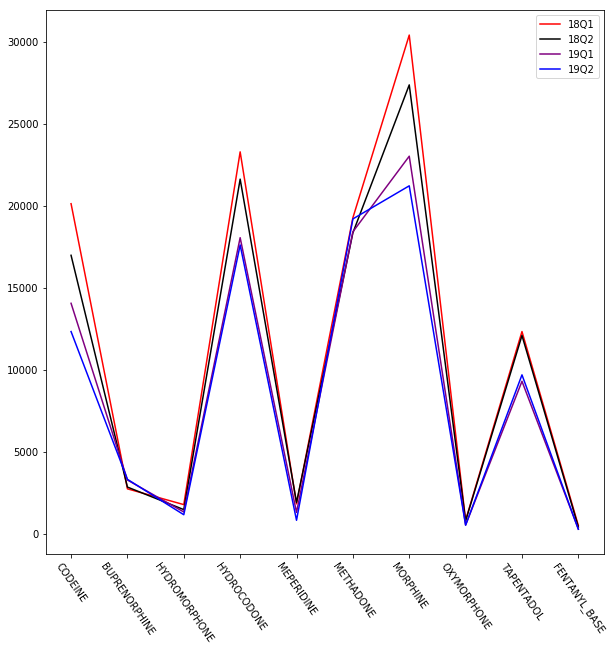

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
labels = tempe1_18['DRUG']
ax.plot(tempe1_18['DRUG'], tempe1_18['QUARTER_1'],color='red',label='18Q1')
ax.plot(tempe1_18['DRUG'], tempe1_18['QUARTER_2'],color='black',label='18Q2')
ax.plot(tempe1_19['DRUG'], tempe1_19['QUARTER_1'],color='purple',label='19Q1')
ax.plot(tempe1_19['DRUG'], tempe1_19['QUARTER_2'],color='blue',label='19Q2')

for tick in ax.get_xticklabels():
    tick.set_rotation(-55)
    
ax.legend()

#plt(tempe1_19['QUARTER_1'], tempe1_19['QUARTER_2'])

In [45]:
print(stats.shapiro(tempe1_18.QUARTER_1))
print(stats.shapiro(tempe1_19.QUARTER_1))
print(stats.levene(tempe1_18.QUARTER_1,tempe1_19.QUARTER_1))
stats.ttest_ind(tempe1_18.QUARTER_1,tempe1_19.QUARTER_1)

(0.8498075604438782, 0.05778372287750244)
(0.8555756211280823, 0.06765291094779968)
LeveneResult(statistic=0.8399693199481479, pvalue=0.37152210804472807)


Ttest_indResult(statistic=0.5226528553963605, pvalue=0.6075896215167921)

In [46]:
print(stats.shapiro(tempe1_18.QUARTER_2))
print(stats.shapiro(tempe1_19.QUARTER_2))
print(stats.levene(tempe1_18.QUARTER_2,tempe1_19.QUARTER_2))
stats.ttest_ind(tempe1_18.QUARTER_2,tempe1_19.QUARTER_2)

(0.8578683137893677, 0.07201274484395981)
(0.8463671207427979, 0.0525786317884922)
LeveneResult(statistic=0.563496773456738, pvalue=0.4625558259610322)


Ttest_indResult(statistic=0.4238114061946555, pvalue=0.6767247641556666)

### Cincinnati, OH

In [48]:
cin1_18 = rp1_18[rp1_18['ZIP_CODE']==452]
drops = ['index','QUARTER_3','QUARTER_4','TOTAL_GRAMS']
cin1_18.reset_index(inplace=True)
cin1_18.drop(drops, axis=1, inplace=True)
cin1_18['TOTAL_GRAMS'] = cin1_18['QUARTER_1'] + cin1_18['QUARTER_2']
cin1_18

/Users/maddiewarndorf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,TOTAL_GRAMS
0,CODEINE,OH,452,5955.39,5070.05,11025.44
1,BUPRENORPHINE,OH,452,5000.42,4566.12,9566.54
2,HYDROMORPHONE,OH,452,619.59,425.37,1044.96
3,HYDROCODONE,OH,452,10312.24,9810.97,20123.21
4,MEPERIDINE,OH,452,890.24,683.02,1573.26
5,METHADONE,OH,452,12586.45,14025.98,26612.43
6,MORPHINE,OH,452,8249.03,7293.51,15542.54
7,OXYMORPHONE,OH,452,210.31,189.04,399.35
8,TAPENTADOL,OH,452,2457.00,2472.00,4929.00
9,FENTANYL_BASE,OH,452,159.90,151.01,310.91


In [49]:
print("Cincinnati 2018 Q1")
print(cin1_18.QUARTER_1.describe())
print("Cincinnati 2018 Q2")
print(cin1_18.QUARTER_2.describe())
print(stats.shapiro(cin1_18.QUARTER_1))
print(stats.shapiro(cin1_18.QUARTER_2))
stats.levene(cin1_18.QUARTER_1,cin1_18.QUARTER_2)

Cincinnati 2018 Q1
count       10.000000
mean      4644.057000
std       4532.460648
min        159.900000
25%        687.252500
50%       3728.710000
75%       7675.620000
max      12586.450000
Name: QUARTER_1, dtype: float64
Cincinnati 2018 Q2
count       10.00000
mean      4468.70700
std       4712.35671
min        151.01000
25%        489.78250
50%       3519.06000
75%       6737.64500
max      14025.98000
Name: QUARTER_2, dtype: float64
(0.887789785861969, 0.16010808944702148)
(0.8745236396789551, 0.1128290593624115)


LeveneResult(statistic=0.006159776267663265, pvalue=0.9383087774310945)

In [50]:
cin1_18t = stats.ttest_ind(cin1_18.QUARTER_1,cin1_18.QUARTER_2)
cin1_18t

Ttest_indResult(statistic=0.08480866435162165, pvalue=0.9333496677840362)

In [51]:
cin1_19 = rp1_19[rp1_19['ZIP_CODE']==452]
cin1_19.reset_index(inplace=True)
cin1_19.drop(['index'], axis=1, inplace=True)
cin1_19.drop([2], axis=0, inplace=True)
cin1_19.reset_index(inplace=True)
cin1_19.drop(['index'], axis=1, inplace=True)
cin1_19

,DRUG,STATE,ZIP_CODE,QUARTER_1,QUARTER_2,TOTAL_GRAMS
0,CODEINE,OH,452,4059.48,3780.03,7839.51
1,BUPRENORPHINE,OH,452,4672.99,4533.32,9206.31
2,HYDROMORPHONE,OH,452,381.75,391.09,772.84
3,HYDROCODONE,OH,452,8425.35,8278.04,16703.39
4,MEPERIDINE,OH,452,571.92,461.35,1033.27
5,METHADONE,OH,452,13795.37,13783.69,27579.06
6,MORPHINE,OH,452,6541.44,6205.88,12747.32
7,OXYMORPHONE,OH,452,142.20,131.54,273.74
8,TAPENTADOL,OH,452,2185.00,2398.50,4583.50
9,FENTANYL_BASE,OH,452,110.06,107.44,217.50


In [52]:
print("Cincinnati 2019 Q1")
print(cin1_19.QUARTER_1.describe())
print("Cincinnati 2019 Q2")
print(cin1_19.QUARTER_2.describe())
print(stats.shapiro(cin1_19.QUARTER_1))
print(stats.shapiro(cin1_19.QUARTER_2))
stats.levene(cin1_19.QUARTER_1,cin1_19.QUARTER_2)

Cincinnati 2019 Q1
count       10.000000
mean      4088.556000
std       4478.614489
min        110.060000
25%        429.292500
50%       3122.240000
75%       6074.327500
max      13795.370000
Name: QUARTER_1, dtype: float64
Cincinnati 2019 Q2
count       10.000000
mean      4007.088000
std       4440.326828
min        107.440000
25%        408.655000
50%       3089.265000
75%       5787.740000
max      13783.690000
Name: QUARTER_2, dtype: float64
(0.8621445298194885, 0.08087917417287827)
(0.8564711809158325, 0.06932464241981506)


LeveneResult(statistic=0.00615599497652303, pvalue=0.9383276744974902)

In [53]:
cin1_19t = stats.ttest_ind(cin1_19.QUARTER_1,cin1_19.QUARTER_2)
cin1_19t

Ttest_indResult(statistic=0.04084931181697876, pvalue=0.9678657213112931)

In [54]:
print(stats.shapiro(cin1_18.QUARTER_1))
print(stats.shapiro(cin1_19.QUARTER_1))
print(stats.levene(cin1_18.QUARTER_1,cin1_19.QUARTER_1))
stats.ttest_ind(cin1_18.QUARTER_1,cin1_19.QUARTER_1)

(0.887789785861969, 0.16010808944702148)
(0.8621445298194885, 0.08087917417287827)
LeveneResult(statistic=0.09722548742942837, pvalue=0.7587677334822909)


Ttest_indResult(statistic=0.275686486373585, pvalue=0.7859288900953336)

In [55]:
print(stats.shapiro(cin1_18.QUARTER_2))
print(stats.shapiro(cin1_19.QUARTER_2))
print(stats.levene(cin1_18.QUARTER_2,cin1_19.QUARTER_2))
stats.ttest_ind(cin1_18.QUARTER_2,cin1_19.QUARTER_2)

(0.8745236396789551, 0.1128290593624115)
(0.8564711809158325, 0.06932464241981506)
LeveneResult(statistic=0.08490027174418519, pvalue=0.7740945124784012)


Ttest_indResult(statistic=0.22545428465214162, pvalue=0.8241658088762999)

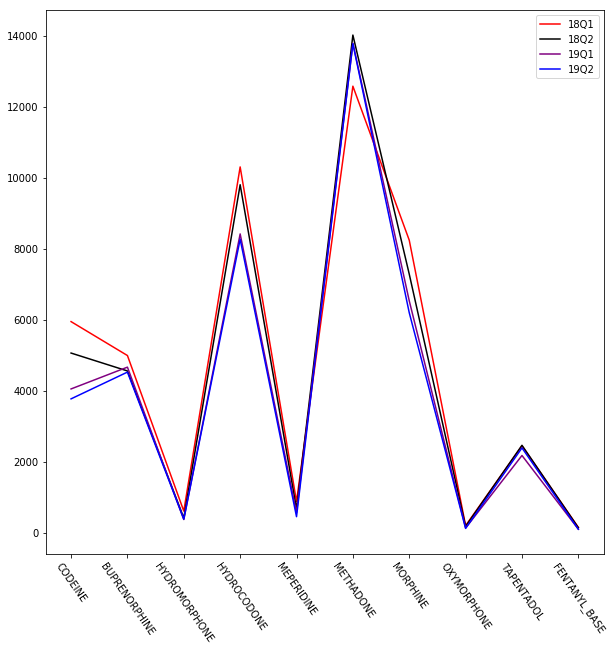

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
labels = cin1_18['DRUG']
ax.plot(cin1_18['DRUG'], cin1_18['QUARTER_1'],color='red',label='18Q1')
ax.plot(cin1_18['DRUG'], cin1_18['QUARTER_2'],color='black',label='18Q2')
ax.plot(cin1_19['DRUG'], cin1_19['QUARTER_1'],color='purple',label='19Q1')
ax.plot(cin1_19['DRUG'], cin1_19['QUARTER_2'],color='blue',label='19Q2')

for tick in ax.get_xticklabels():
    tick.set_rotation(-55)
    
ax.legend()